# ConsumerInsights: Behavioral Analytics & Churn Prediction
**Objective:** Identify high-risk customers and understand the behavioral triggers behind service cancellation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

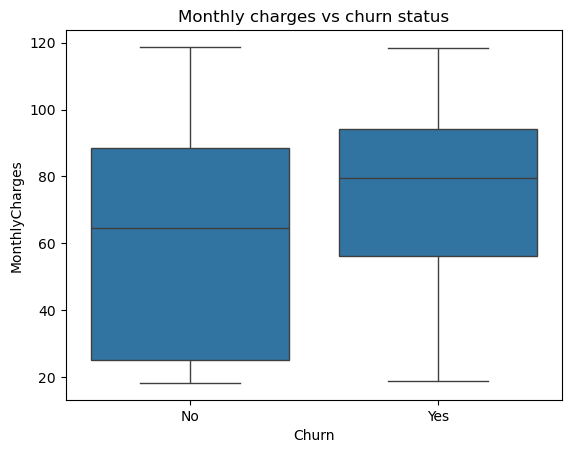

In [5]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.title('Monthly charges vs churn status')
plt.show()


In [6]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df_encoded = pd.get_dummies(df.drop('customerID', axis=1))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
X = df_encoded.drop('Churn', axis= 1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model  =  RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

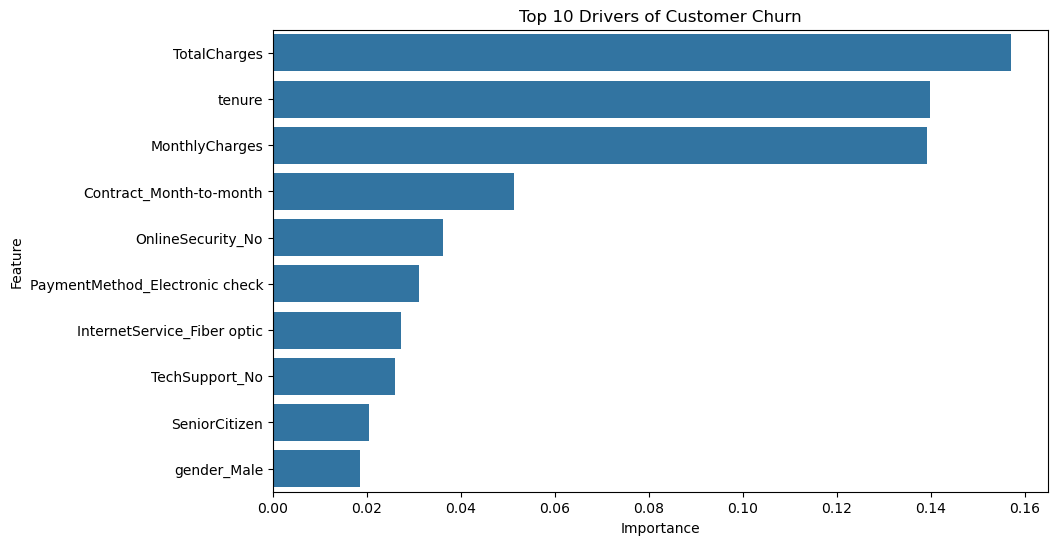

In [10]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Drivers of Customer Churn')
plt.show()

In [11]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[920 113]
 [200 174]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [ ]:
# add your own data to make prediction
new_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29,
    'TotalCharges': 29
}


new_df = pd.DataFrame([new_data])

In [ ]:
new_df_encoded = pd.get_dummies(new_df)

new_df_encoded = new_df_encoded.reindex(columns=X.columns, fill_value=0)

In [ ]:
prediction = model.predict(new_df_encoded)

probability = model.predict_proba(new_df_encoded)

print(f"Prediction: {'Will Churn' if prediction[0] == 1 else 'Will Stay'}")
print(f"Risk Score: {probability[0][1] * 100:.2f}%")

Prediction: Will Stay
Risk Score: 25.00%
